In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data_path = '../scrape_func/'

In [3]:
games = pd.read_csv(data_path + 'data/game_list.csv')
horoyois = pd.read_csv(data_path + 'data/horoyoi_list.csv')

games.head()
# horoyoi.head()

,name,img,link
0,\nカルカソンヌ(Carcassonne)\n,https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=c...
1,\n世界の七不思議(7Wonders)\n,https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=s...
2,\nキングドミノ(Kingdomino)\n,https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=k...
3,\nニムト(6nimmt!)\n,https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=s...
4,\nテラミスティカ(TerraMystica)\n,https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=t...


In [4]:
# 名前修正

games['name'] = games['name'].apply(lambda x: x.replace('\n', ''))

games.head()

,name,img,link
0,カルカソンヌ(Carcassonne),https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=c...
1,世界の七不思議(7Wonders),https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=s...
2,キングドミノ(Kingdomino),https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=k...
3,ニムト(6nimmt!),https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=s...
4,テラミスティカ(TerraMystica),https://x.boardgamearena.net/data/themerelease...,https://ja.boardgamearena.com/gamepanel?game=t...


In [5]:
horoyois.head()

,name,img
0,白いサワー,https://www.suntory.co.jp/rtd/horoyoi/assets/i...
1,グレープ,https://www.suntory.co.jp/rtd/horoyoi/assets/i...
2,もも,https://www.suntory.co.jp/rtd/horoyoi/assets/i...
3,アイスティーサワー,https://www.suntory.co.jp/rtd/horoyoi/assets/i...
4,白ぶどう,https://www.suntory.co.jp/rtd/horoyoi/assets/i...


In [6]:
import cv2
import sklearn
from sklearn.cluster import KMeans

def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8):
    try:
        n = np.fromfile(filename, dtype)
        img = cv2.imdecode(n, flags)
        return img
    except Exception as e:
        print(e)
        return None

In [7]:
# example

# 画像読み込み
_sample_image = imread(data_path + 'images/horoyoi/グレープ.png')

print('shape:' + str(_sample_image.shape))

# to 2dimention
sample_image = _sample_image.reshape(
    (_sample_image.shape[0] * _sample_image.shape[1], 3))

print('converted shape:' + str(sample_image.shape))

shape:(474, 256, 3)
converted shape:(121344, 3)


In [8]:
# k-means
cluster = KMeans(n_clusters=5)

In [9]:
cluster.fit(X=sample_image)
# 代表５色
cluster.cluster_centers_

array([[214.68854663, 189.94545846, 236.88057159],
       [  3.13438376,   1.66957049,   1.9114461 ],
       [181.53706564, 151.50222008, 203.47239382],
       [ 83.32030899,  50.25437887,  72.60747328],
       [142.19233769, 112.77490739, 165.54747514]])

In [10]:
# 色クラスごとのサンプル数
result = cluster.fit_predict(sample_image)
_, counts = np.unique(result, return_counts=True)
for i, v in enumerate(counts):
    print('(b, g, r): {} => サンプル数: {}'.format(cluster.cluster_centers_[i], v))

(b, g, r): [181.53706564 151.50222008 203.47239382] => サンプル数: 20720
(b, g, r): [3.13438376 1.66957049 1.9114461 ] => サンプル数: 13201
(b, g, r): [214.68854663 189.94545846 236.88057159] => サンプル数: 55774
(b, g, r): [83.32030899 50.25437887 72.60747328] => サンプル数: 11133
(b, g, r): [142.19233769 112.77490739 165.54747514] => サンプル数: 20516


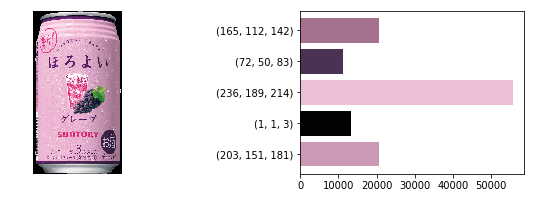

In [11]:
# 色表示
import matplotlib.pyplot as plt
%matplotlib inline

center = cluster.cluster_centers_
_, counts = np.unique(result, return_counts=True)

# matplotlib で棒グラフを作成する。
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 3))
fig.subplots_adjust(wspace=0.5)

# matplotlib の引数の仕様上、[0, 1] にして、(R, G, B) の順番にする。
bar_color = [(r / 255, g / 255, b / 255) for b, g, r in center]
bar_text = [f"({r}, {g}, {b})" for b, g, r in center.astype(np.uint8)]

# 画像を表示する。
ax1.imshow(cv2.cvtColor(_sample_image, cv2.COLOR_BGR2RGB))
ax1.set_axis_off()

# ヒストグラムを表示する。
ax2.barh(np.arange(5), counts, color=bar_color, tick_label=bar_text)
plt.show()

In [12]:
# 代表色だけを取得する

max_idx = np.argmax(counts)
main_bgr_color = center[max_idx]
print(main_bgr_color)

[214.68854663 189.94545846 236.88057159]
